<a href="https://colab.research.google.com/github/Untick/InspectrumClinic_RS_gr1/blob/main/Marfida%20Alexander/A_Marfida_stajirovka_profpatolog_3(ohe_1b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Стажировка. Профпатолог (INSPECTRUM CLINIC)
- Модели обучения для категориальных данных без удаления NaN в целевом столбце.
. Балансировка дублированием и равномерным перемешиванием.
- Целевые категории:
  - Годен
  - Не годен
  - Ограниченно годен
  - Недостаточно данных для заключения

# ЗАГРУЗКА БИБЛИОТЕК И ДАТАСЕТОВ

In [ ]:
# Подключение библиотек

# Работа с массивами данных
import numpy as np

# Работа с табличными данными
import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential, Model

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, Input, concatenate
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Оптимизаторы
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop

# Токенизатор для преобразования текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Предварительная обработка данных
# from sklearn import preprocessing

# Масштабирование данных
from sklearn.preprocessing import StandardScaler

#from sklearn.datasets import fetch_openml
#from sklearn.model_selection import cross_val_predict
#from sklearn.linear_model import SGDClassifier

# Загрузка датасетов из облака google
import gdown

# Регулярные выражения
import re

# Связь с google-диском
from google.colab import files

# Отрисовка графиков
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Создание статистических графиков
import seaborn as sns

# Табличные данные
from fastai.tabular import *

# Метрики для расчета ошибок
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Очистка экрана
from IPython.display import clear_output

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

In [ ]:
# Монтирование Goodle-диска
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Загрузка ранее сохранённых датасетов

In [ ]:
x_train_norm_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm_1.npy')
x_train_ohe_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe_1.npy')
y_train_norm_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm_1.npy')
y_train_ohe_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_1.npy')

x_train_norm_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm_1b.npy')
x_train_ohe_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe_1b.npy')
y_train_norm_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm_1b.npy')
y_train_ohe_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_1b.npy')

x_train_norm_0 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm_0.npy')
x_train_ohe_0 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe_0.npy')
y_train_norm_0 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm_0.npy')
y_train_ohe_0 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_0.npy')

x_train_norm_0b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm_0b.npy')
x_train_ohe_0b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe_0b.npy')
y_train_norm_0b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm_0b.npy')
y_train_ohe_0b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_0b.npy')

Сохранение датасетов

In [ ]:
np.save('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_norm.npy', x_train_norm)
np.save('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe.npy', x_train_ohe)
np.save('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm.npy', y_train_norm)
np.save('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe.npy', y_train_ohe)

# СЛУЖЕБНЫЕ ФУНКЦИИ

Загрузка датасетов

In [ ]:
x_train_ohe_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/x_train_ohe_1b.npy')
# x_train_ohe_1 = np.load('/content/drive/MyDrive/УИИ(maredmi777)/Стажировка Профпатолог/x_train_ohe_1.npy')
# y_train_norm_1 = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_norm_1.npy')
y_train_ohe_1b = np.load('/content/drive/MyDrive/УИИ(marphida)/Стажировка Профпатолог/y_train_ohe_1b.npy')
# y_train_ohe_1 = np.load('/content/drive/MyDrive/УИИ(maredmi777)/Стажировка Профпатолог/y_train_ohe_1.npy')
print(x_train_ohe_1b.shape)
print(y_train_ohe_1b.shape)

(5730, 1987)
(5730, 4)


## Функция графиков обучения

In [ ]:
def graphic(loss, accuracy, valloss, valaccuracy, scor, scorloss, exp, param):
  print(
    f'Входных Нейронов: {param[0]}\n',
    f'Значение Dropout: {param[1]}\n',
    f'BatchNormalization: {param[2]}\n',
    f'Средние потери: {param[3]}\n',
    f'Средняя точность на тестовой выборке: {param[4]}\n'
  )
  print('↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓')

  plt.figure(1, figsize=(20, 5))

  plt.subplot(1, 2, 1)
  plt.plot(accuracy, label='Доля верных ответов(train)')
  plt.plot(valaccuracy, label='Доля верных ответов(val)')
#  plt.scatter(19, scor/100, c='r')
  plt.title(f'Опыт№ {exp+1}. Параметры модели: {param}')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Доля верных ответов')
  plt.grid(color='gray', linestyle=':')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(loss, label='train_loss')
  plt.plot(valloss, label='val_loss')
#  plt.scatter(19, scorloss, c='r')
  plt.title(f'Опыт№ {exp+1}, loss')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.legend()
  plt.grid(color='gray',linestyle=':')
  print()
  plt.show()

## Функция создания модели

In [ ]:
def сreatModel(numN, drop, norm=False, layer2=0, layer3=0):

    # Создание последовательной модели
    model = Sequential()

    if norm:
        model.add(BatchNormalization(input_shape=(x_train.shape[1], )))
        model.add(Dense(numN, activation="relu"))
    else:
        model.add(Dense(numN, input_dim=x_train.shape[1], activation="relu"))

    if layer2 > 0:
      model.add(Dense(numN*layer2, input_dim=x_train.shape[1], activation="relu"))
    elif layer2 < 0:
      model.add(Dense(int(numN/(-layer2)), input_dim=x_train.shape[1], activation="relu"))

    if layer3 > 0:
      model.add(Dense(numN*layer2, input_dim=x_train.shape[1], activation="relu"))
    elif layer3 < 0:
      model.add(Dense(int(numN/(-layer2)), input_dim=x_train.shape[1], activation="relu"))

    model.add(Dropout(drop))
    model.add(Dense(4, activation="softmax")) #

    # Компиляция модели
    model.compile(loss="categorical_crossentropy",
                    optimizer="adam",
                    metrics=["accuracy"])
    return model

## Функция обучения и тестирования модели

In [ ]:
def training(dense_list, drop_list, norm_list, layer2=0, layer3=0):

  parameters = []
  val_accuracy= []
  val_loss_ = []
  accuracy= []
  loss_ = []

  for numN in dense_list:
    for norm in norm_list:
      for drop in drop_list:

        print('Параметры модели: вх.нейр.=', numN, '; откл.нейр.=', drop, '; BatchNormalization=', norm)

        # Создание последовательной модели
        model = сreatModel(numN, drop, norm=norm, layer2=layer2, layer3=layer3)

        # Обучение модели
        history = model.fit(x_train,    # обучающая выборка экземпляры класса
                  y_train,              # обучающая выборка метки класса
                  batch_size=128,       # размер батча
                  epochs=20,            # количество эпох
                  verbose=1,            # 0 - не показывать ход обучения, 1 - показывать
                  validation_data=(x_val, y_val) # выборка для валидации
                  )
        scores = model.evaluate(x_test, y_test)
        print('Точность на тестовой выборке:', scores[1] )

        parameters.append([numN, drop, norm, round(scores[0], 4), round(scores[1], 4)*100])
        val_accuracy.append(history.history['val_accuracy'])
        val_loss_.append(history.history['val_loss'])
        accuracy.append(history.history['accuracy'])
        loss_.append(history.history['loss'])

  return parameters, accuracy, loss_, val_accuracy, val_loss_

## Разделение на обучающую, валидационную и тестовую выборки

In [ ]:
X_tr_n = x_train_ohe_1b.copy()
# X_tr_o = x_train_ohe_1
# Y_tr_n = y_train_norm_1
Y_tr_o = y_train_ohe_1b.copy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_trn, Y_trn,
                                                    train_size=0.8,
                                                    random_state=42)#, shuffle=False) # shuffle=False - не перемешивать

In [ ]:
train_sep = int(X_tr_n.shape[0] * 0.8)
x_train, x_test, y_train, y_test =  X_tr_n[:train_sep], X_tr_n[train_sep:], Y_tr_o[:train_sep], Y_tr_o[train_sep:]
print('x_train.shape = ', x_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_train.shape = ', y_train.shape)
print('y_test.shape', y_test.shape)
print()
val_sep = int(x_train.shape[0] * 0.8)
x_train, x_val, y_train, y_val = x_train[:val_sep], x_train[val_sep:], y_train[:val_sep], y_train[val_sep:]
print('x_train.shape = ', x_train.shape)
print('x_val.shape = ', x_val.shape)
print('y_train.shape = ', y_train.shape)
print('y_val.shape', y_val.shape)


x_train.shape =  (4584, 1987)
x_test.shape =  (1146, 1987)
y_train.shape =  (4584, 4)
y_test.shape (1146, 4)

x_train.shape =  (3667, 1987)
x_val.shape =  (917, 1987)
y_train.shape =  (3667, 4)
y_val.shape (917, 4)


## Создание модели

In [ ]:
model1 = сreatModel(64, 0.1, True)

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 1987)             7948      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 64)                127232    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 135,440
Trainable params: 131,466
Non-trainable params: 3,974
_________________________________________________________________


In [ ]:
model1 = сreatModel(64, 0.1, True, 2)

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Batc  (None, 1987)             7948      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 64)                127232    
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 516       
                                                                 
Total params: 144,016
Trainable params: 140,042
Non-trainable params: 3,974
____________________________________________

In [ ]:
y_train

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

### Списки гиперпараметров

In [ ]:
dense_param = [32, 64, 128, 256]             # кол-во нейронов во входном слое
drop_param  = [0.01, 0.25]        # доля отключаемых нейронов, слой Dropout
norm_param = [False, True]             # для BatchNormalization

### Обучение модели с одним слоем

In [ ]:
par, acc, loss, val_acc, val_loss = training(dense_param, drop_param, norm_param)

Параметры модели: вх.нейр.= 32 ; откл.нейр.= 0.01 ; BatchNormalization= False
Epoch 1/20
29/29 [==============================] - 5s 12ms/step - loss: 0.9587 - accuracy: 0.7270 - val_loss: 0.7820 - val_accuracy: 0.8364
Epoch 2/20
29/29 [==============================] - 0s 5ms/step - loss: 0.5057 - accuracy: 0.8947 - val_loss: 0.5043 - val_accuracy: 0.8495
Epoch 3/20
29/29 [==============================] - 0s 5ms/step - loss: 0.2989 - accuracy: 0.9209 - val_loss: 0.3634 - val_accuracy: 0.8637
Epoch 4/20
29/29 [==============================] - 0s 5ms/step - loss: 0.1955 - accuracy: 0.9534 - val_loss: 0.2781 - val_accuracy: 0.8953
Epoch 5/20
29/29 [==============================] - 0s 5ms/step - loss: 0.1404 - accuracy: 0.9678 - val_loss: 0.2388 - val_accuracy: 0.9095
Epoch 6/20
29/29 [==============================] - 0s 4ms/step - loss: 0.1071 - accuracy: 0.9746 - val_loss: 0.2030 - val_accuracy: 0.9128
Epoch 7/20
29/29 [==============================] - 0s 5ms/step - loss: 0.0883 - 

In [ ]:
print(acc[1])
print(val_acc[1], '\n')
print(loss[1])
print(val_loss[1])

[0.7114807963371277, 0.8699209094047546, 0.9078265428543091, 0.9304608702659607, 0.9511862397193909, 0.9612762331962585, 0.9686391949653625, 0.9716389179229736, 0.9751840829849243, 0.9790018796920776, 0.9814562201499939, 0.9830924272537231, 0.9888191819190979, 0.9888191819190979, 0.9923643469810486, 0.9910008311271667, 0.9934551119804382, 0.9937278628349304, 0.992637038230896, 0.9931824207305908]
[0.8287895321846008, 0.8484187722206116, 0.8571428656578064, 0.8724100589752197, 0.8953108191490173, 0.907306432723999, 0.9116684794425964, 0.9149399995803833, 0.9171210527420044, 0.9193020462989807, 0.9149399995803833, 0.9389312863349915, 0.9389312863349915, 0.9378407597541809, 0.9509269595146179, 0.9487459063529968, 0.94547438621521, 0.9552890062332153, 0.9541984796524048, 0.9531079530715942] 

[0.8939942717552185, 0.5008745789527893, 0.3487389385700226, 0.25826096534729004, 0.20015496015548706, 0.1602519005537033, 0.13728585839271545, 0.11491033434867859, 0.10074479132890701, 0.083077855408

In [ ]:
print(np.array(acc[0]).max())
print(np.array(val_acc[0]).max())
print(np.array(loss[0]).min())
print(np.array(val_loss[0]).min())

0.9978183507919312
0.9563794732093811
0.017740866169333458
0.11675259470939636


In [ ]:
par

[[32, 0.01, False, 0.1434, 94.24],
 [32, 0.25, False, 0.1362, 94.15],
 [32, 0.01, True, 0.2571, 93.8],
 [32, 0.25, True, 0.2364, 94.15],
 [64, 0.01, False, 0.1492, 94.24],
 [64, 0.25, False, 0.1544, 94.33],
 [64, 0.01, True, 0.2297, 93.11],
 [64, 0.25, True, 0.2128, 93.54],
 [128, 0.01, False, 0.1446, 94.33],
 [128, 0.25, False, 0.1482, 94.07],
 [128, 0.01, True, 0.2242, 93.72],
 [128, 0.25, True, 0.2333, 93.72],
 [256, 0.01, False, 0.1609, 94.24],
 [256, 0.25, False, 0.1584, 94.42],
 [256, 0.01, True, 0.2085, 94.67999999999999],
 [256, 0.25, True, 0.216, 94.42]]

#### Сводные результаты обучения

In [ ]:
col = [' Число Нейронов ', ' Значение Dropout ',' BatchNormalization? ',' Loss тестовой ', ' Точность тестовой ']
df = pd.DataFrame(par, columns = col, index= np.arange(1, len(par)+1))
df

Число Нейронов    Значение Dropout    BatchNormalization?   \
1                 32                0.01                  False   
2                 32                0.25                  False   
3                 32                0.01                   True   
4                 32                0.25                   True   
5                 64                0.01                  False   
6                 64                0.25                  False   
7                 64                0.01                   True   
8                 64                0.25                   True   
9                128                0.01                  False   
10               128                0.25                  False   
11               128                0.01                   True   
12               128                0.25                   True   
13               256                0.01                  False   
14               256                0.25                  False   
15               256                0.01                   True   
16               256                0.25                   True   

     Loss тестовой    Точность тестовой   
1            0.1434                94.24  
2            0.1362                94.15  
3            0.2571                93.80  
4            0.2364                94.15  
5            0.1492                94.24  
6            0.1544                94.33  
7            0.2297                93.11  
8            0.2128                93.54  
9            0.1446                94.33  
10           0.1482                94.07  
11           0.2242                93.72  
12           0.2333                93.72  
13           0.1609                94.24  
14           0.1584                94.42  
15           0.2085                94.68  
16           0.2160                94.42

#### Графики обучения

Входных Нейронов: 32
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.1434
 Средняя точность на тестовой выборке: 94.24

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



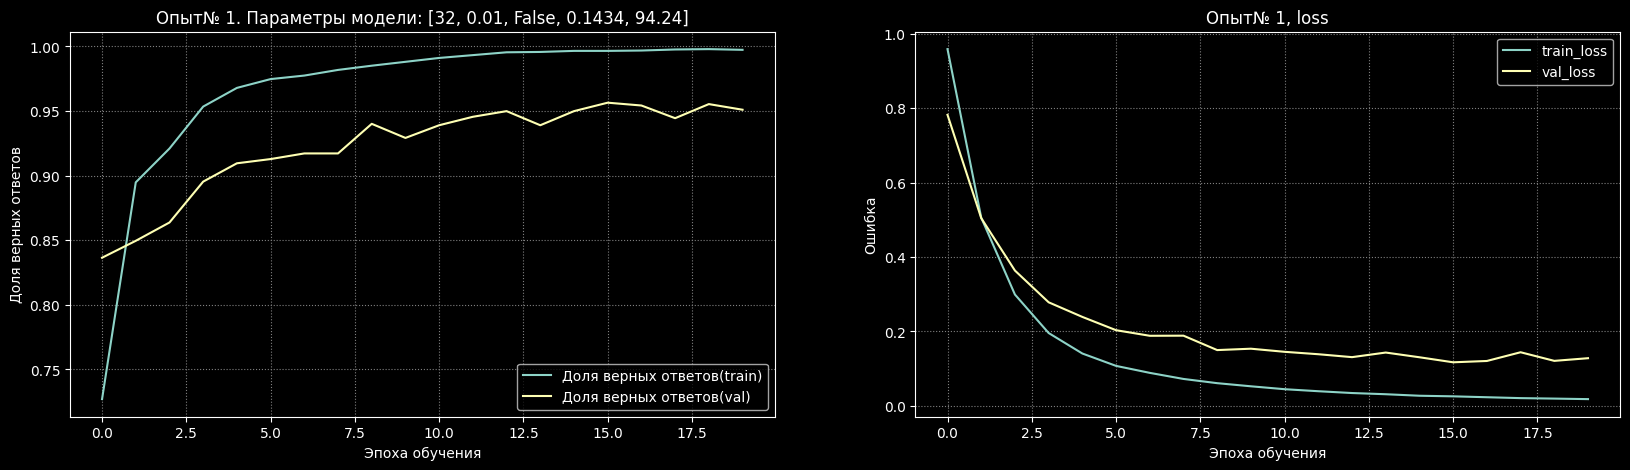

Входных Нейронов: 32
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.1362
 Средняя точность на тестовой выборке: 94.15

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



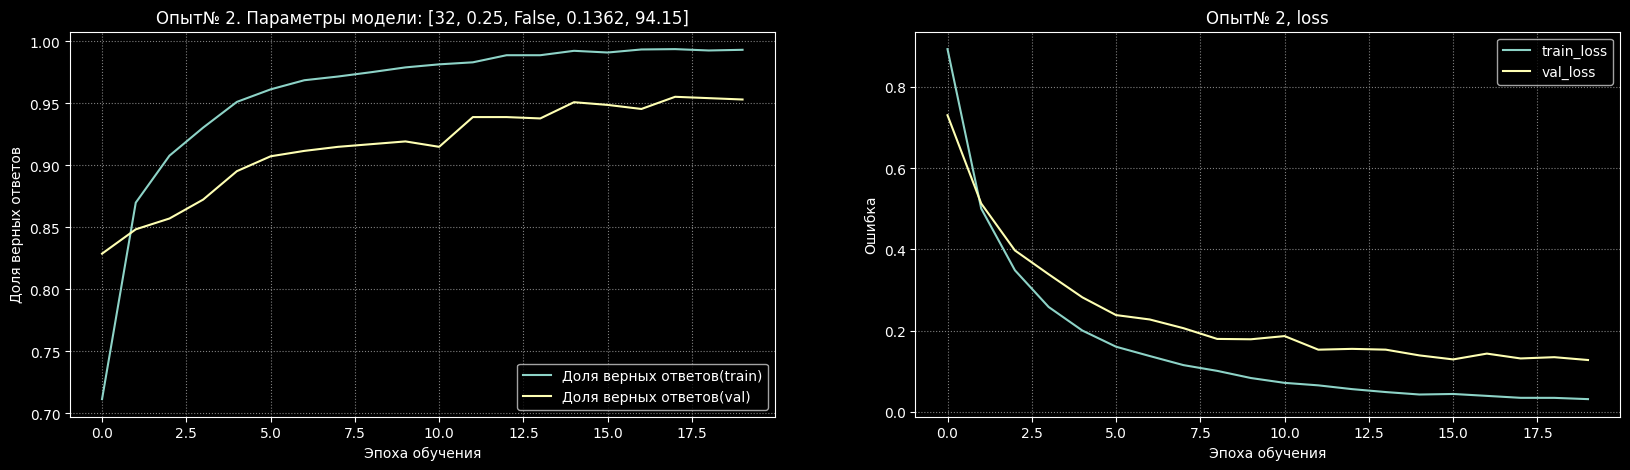

Входных Нейронов: 32
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.2571
 Средняя точность на тестовой выборке: 93.8

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



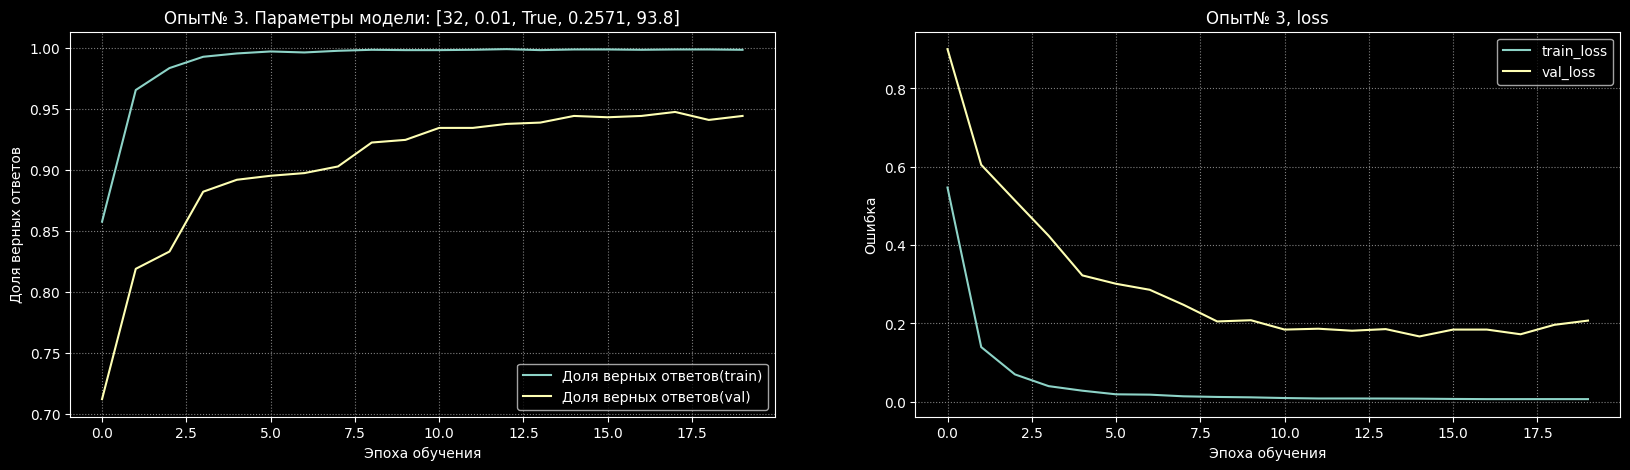

Входных Нейронов: 32
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.2364
 Средняя точность на тестовой выборке: 94.15

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



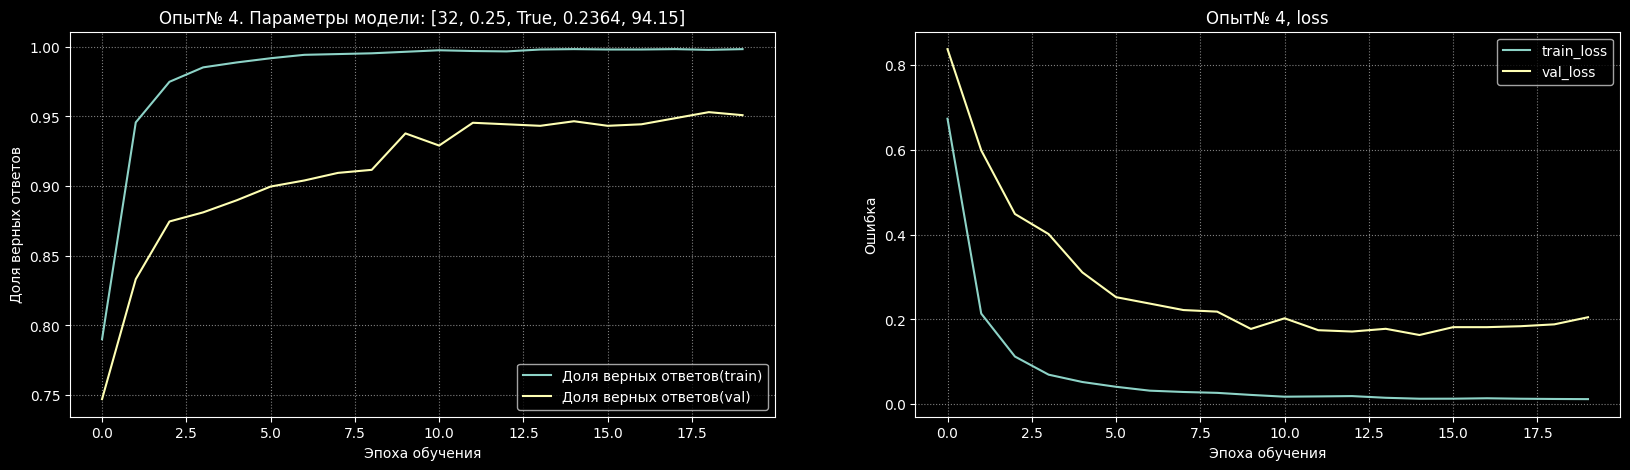

Входных Нейронов: 64
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.1492
 Средняя точность на тестовой выборке: 94.24

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



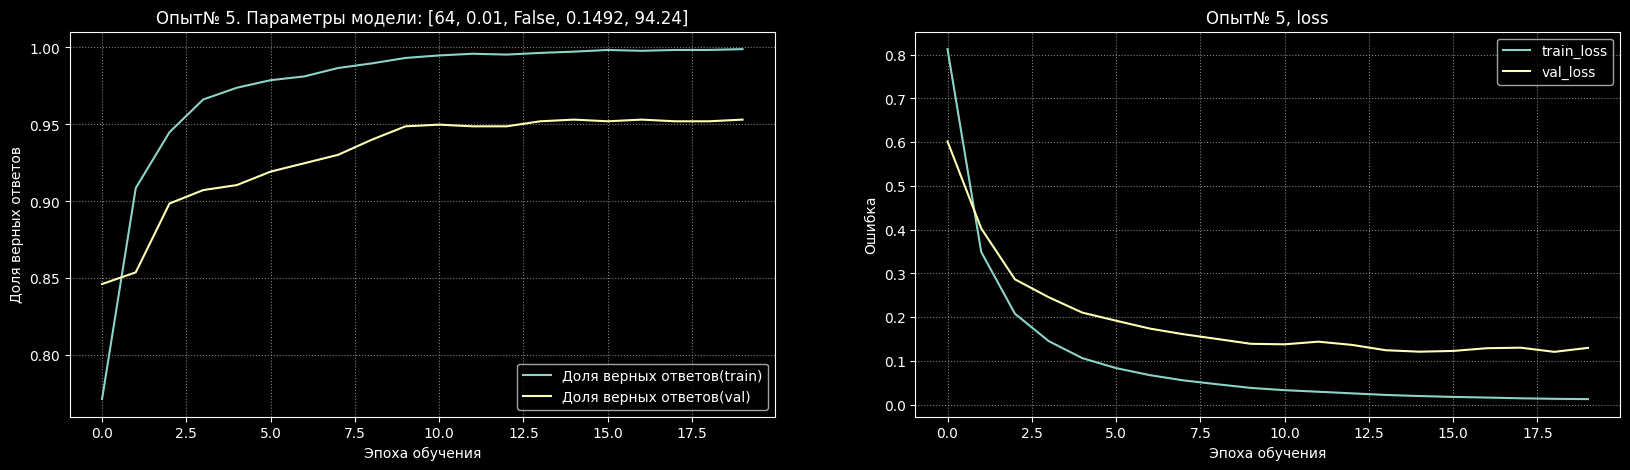

Входных Нейронов: 64
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.1544
 Средняя точность на тестовой выборке: 94.33

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



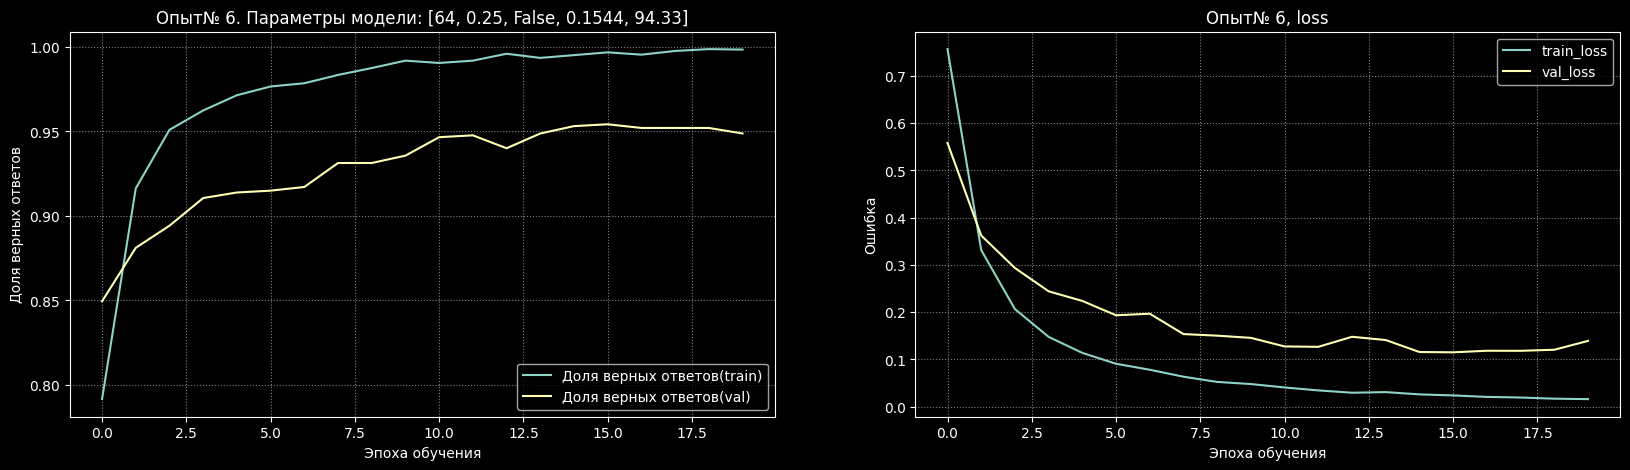

Входных Нейронов: 64
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.2297
 Средняя точность на тестовой выборке: 93.11

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



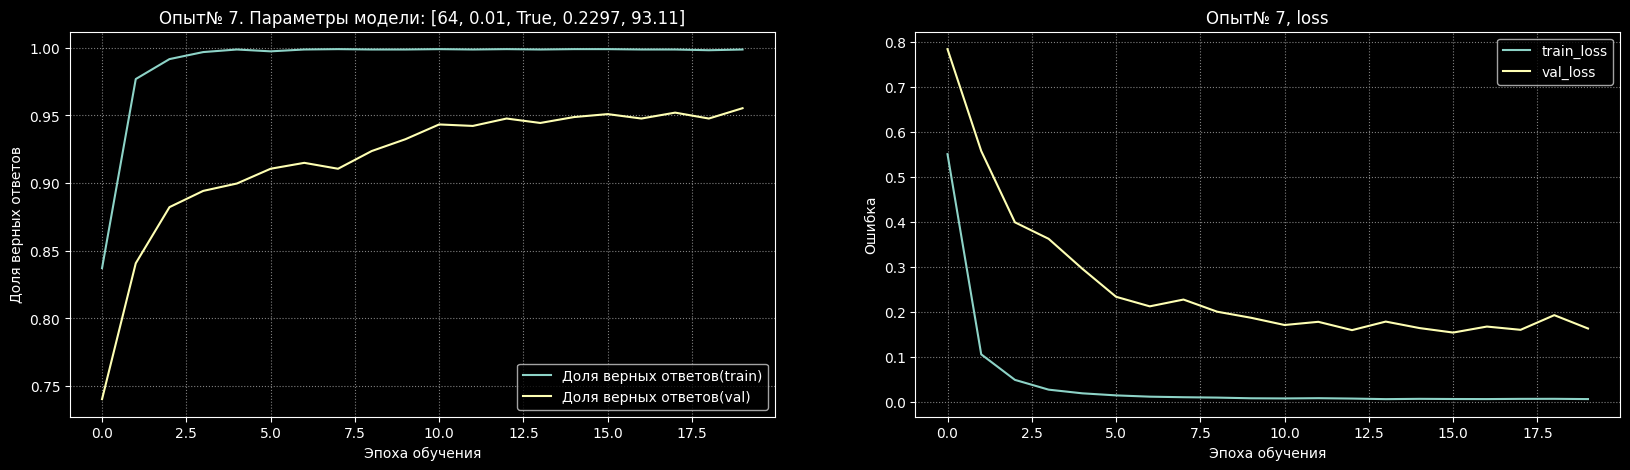

Входных Нейронов: 64
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.2128
 Средняя точность на тестовой выборке: 93.54

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



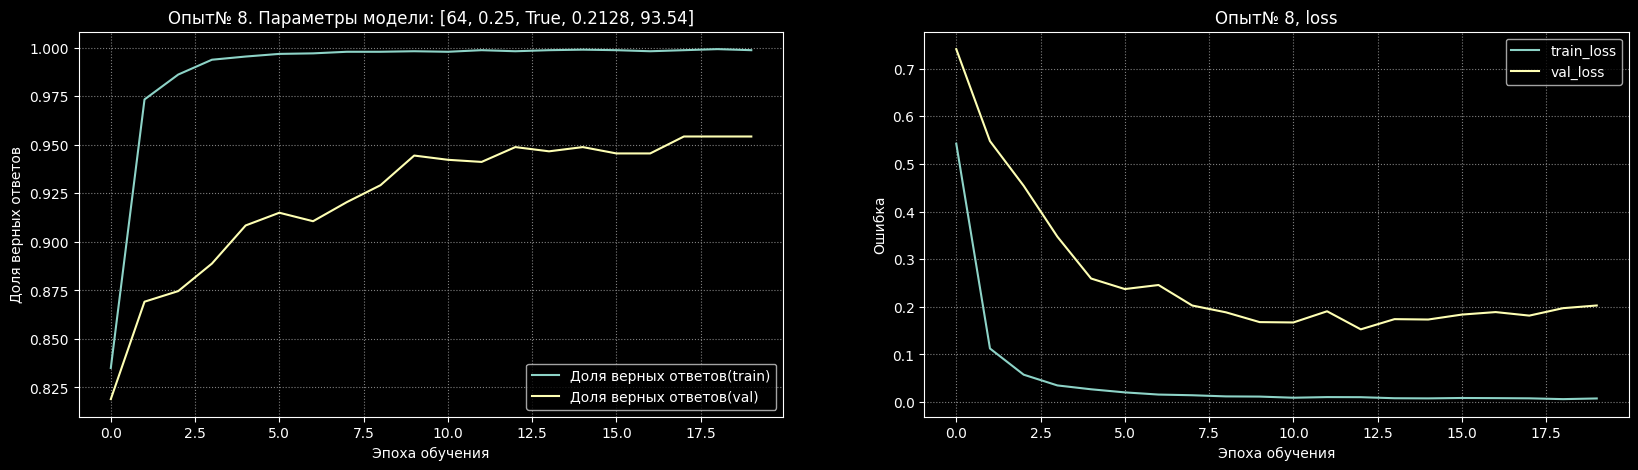

Входных Нейронов: 128
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.1446
 Средняя точность на тестовой выборке: 94.33

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



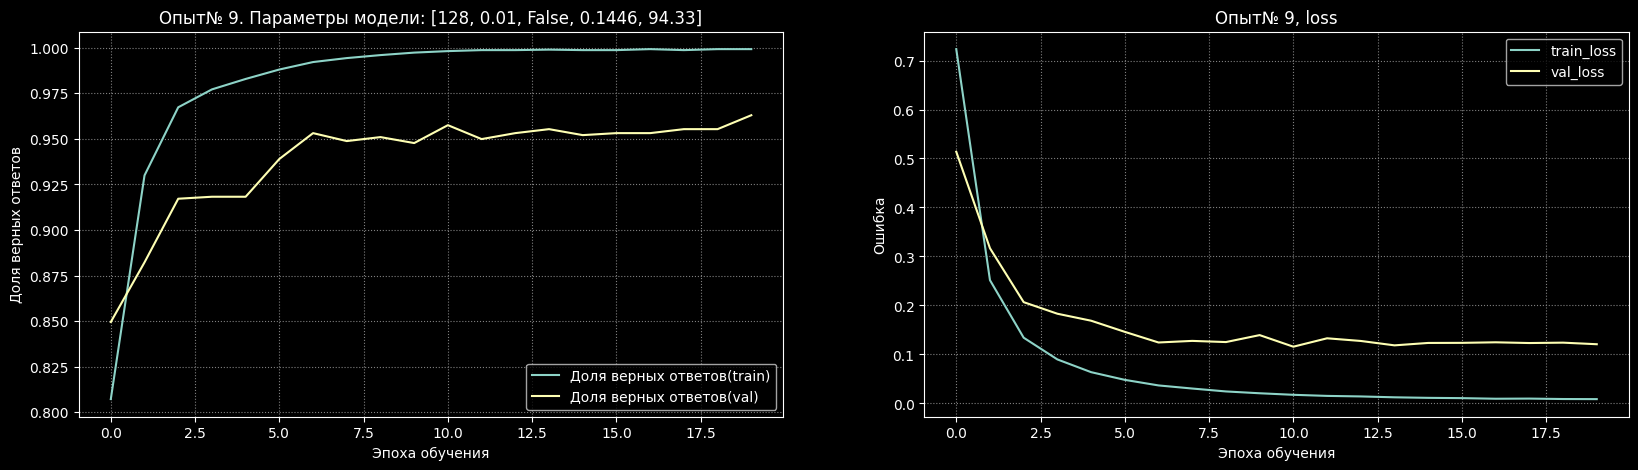

Входных Нейронов: 128
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.1482
 Средняя точность на тестовой выборке: 94.07

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



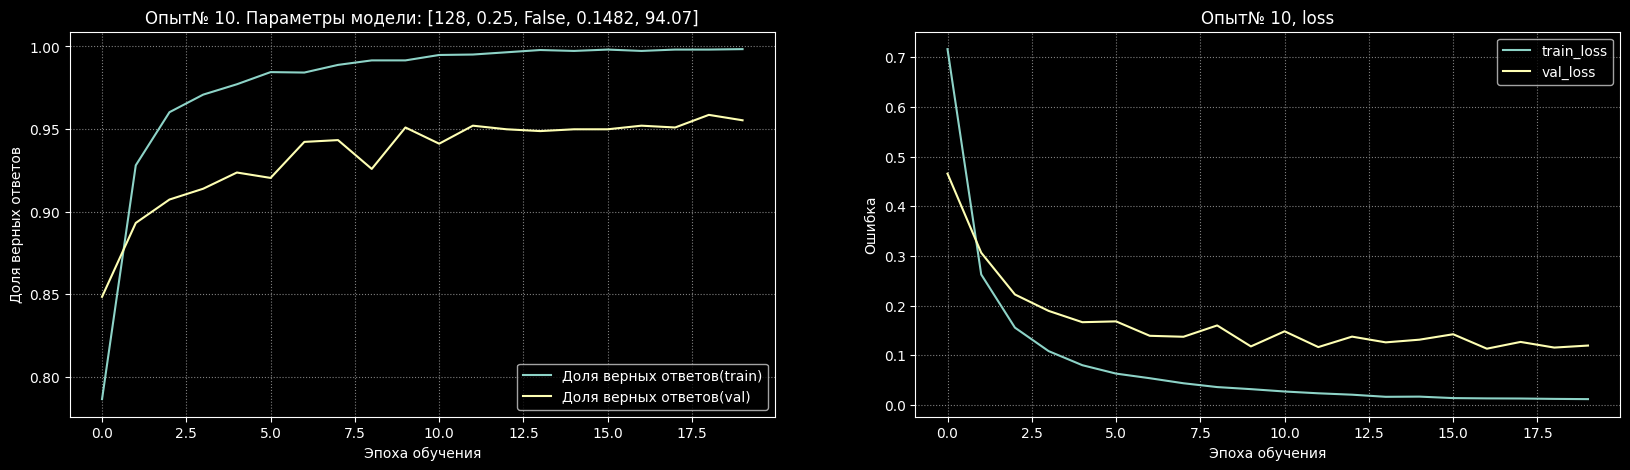

Входных Нейронов: 128
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.2242
 Средняя точность на тестовой выборке: 93.72

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



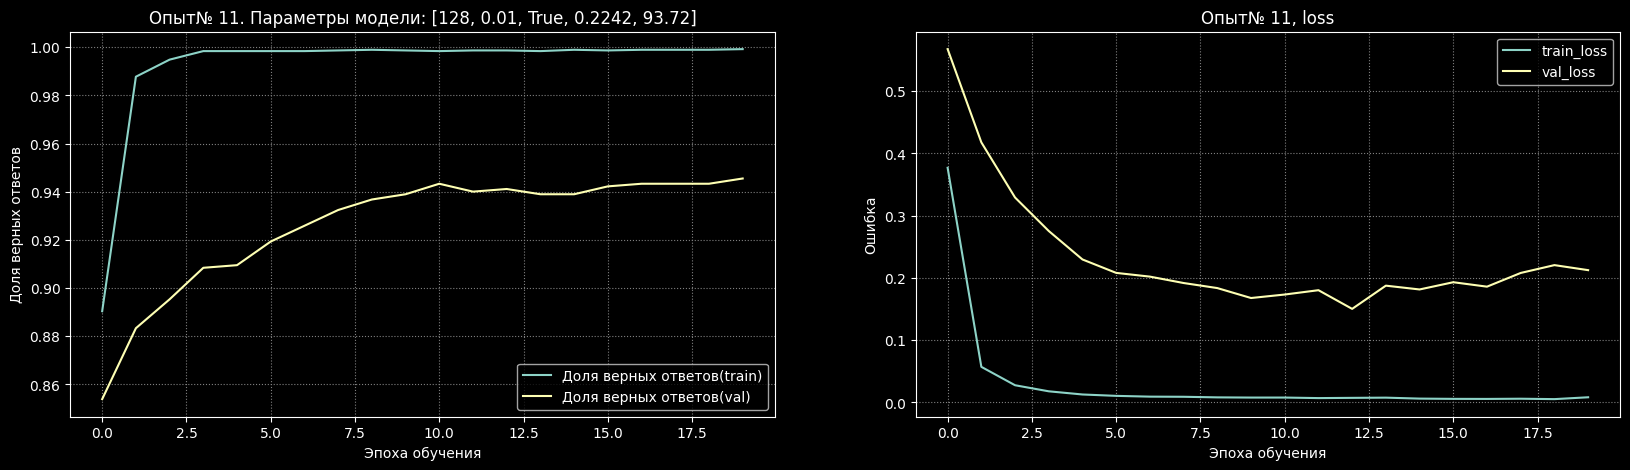

Входных Нейронов: 128
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.2333
 Средняя точность на тестовой выборке: 93.72

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



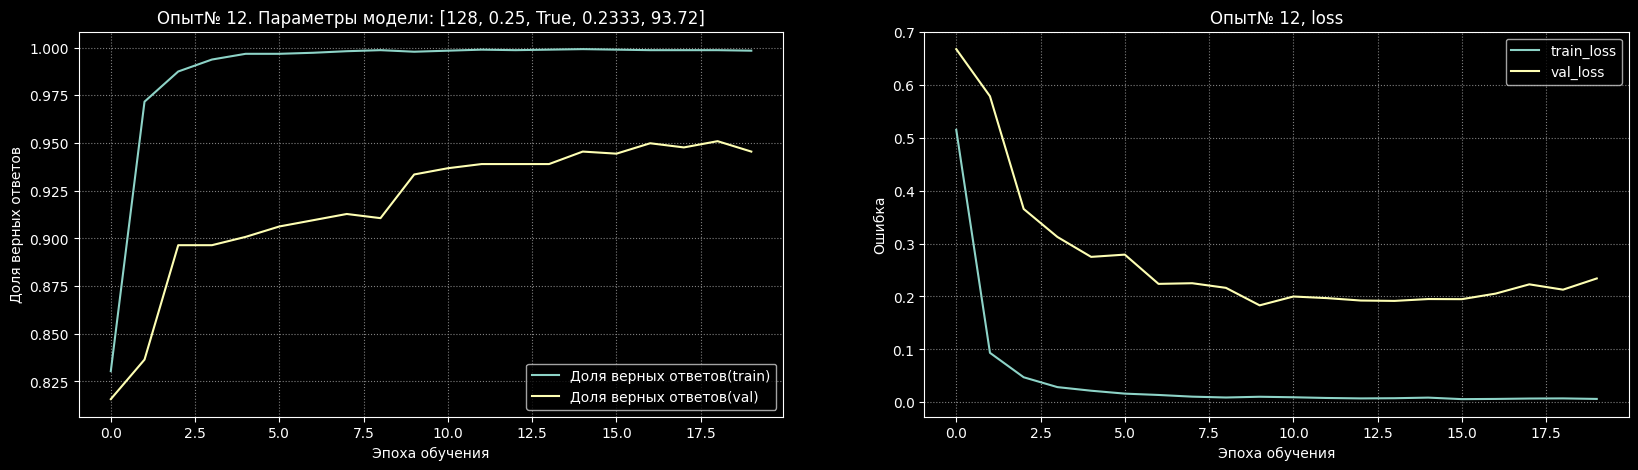

Входных Нейронов: 256
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.1609
 Средняя точность на тестовой выборке: 94.24

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



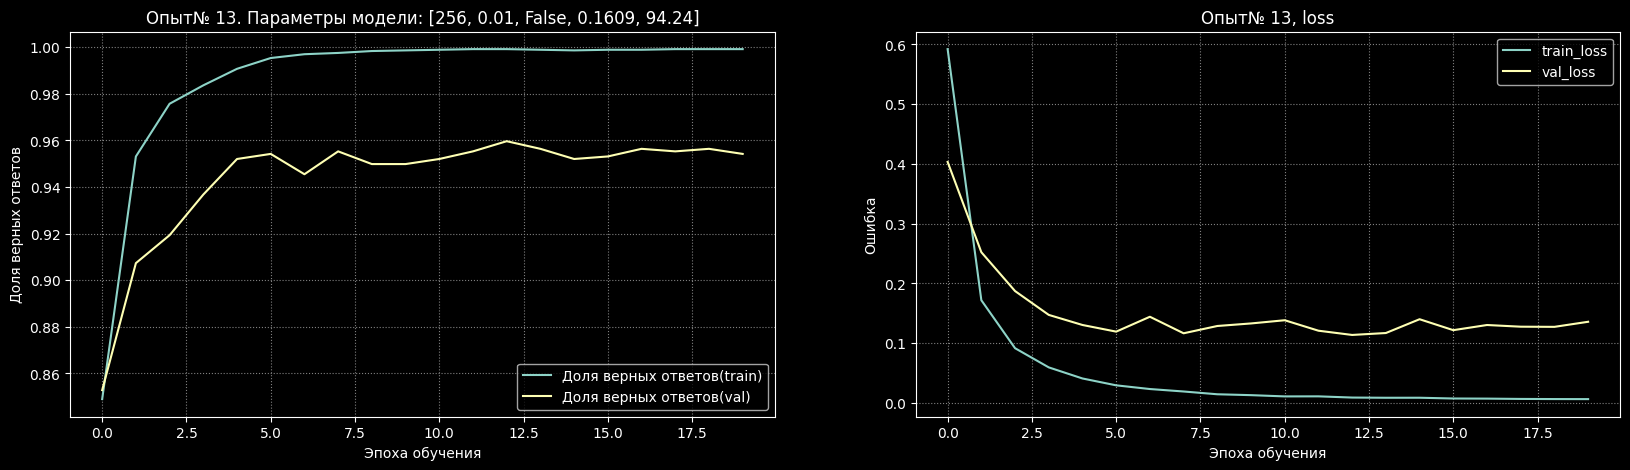

Входных Нейронов: 256
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.1584
 Средняя точность на тестовой выборке: 94.42

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



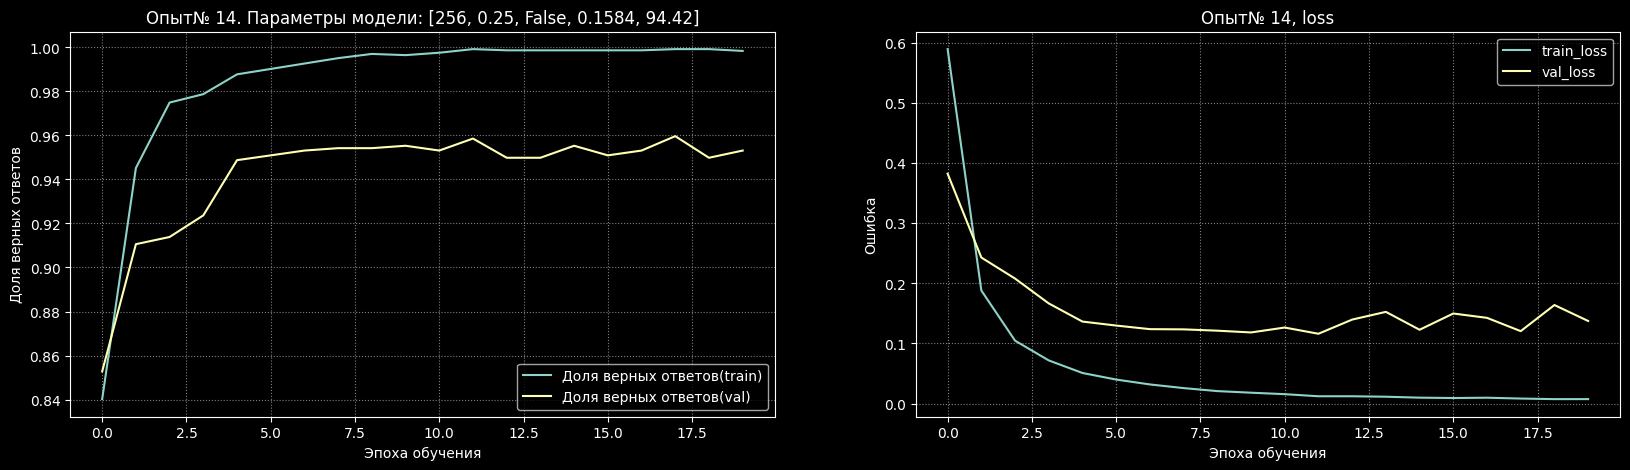

Входных Нейронов: 256
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.2085
 Средняя точность на тестовой выборке: 94.67999999999999

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



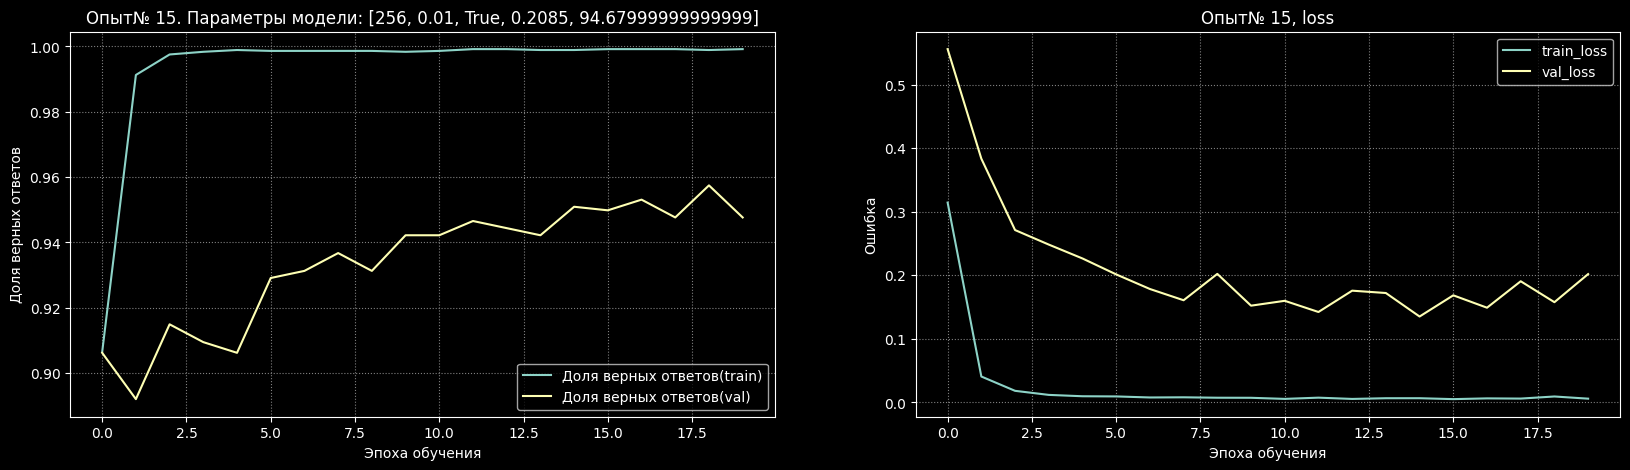

Входных Нейронов: 256
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.216
 Средняя точность на тестовой выборке: 94.42

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



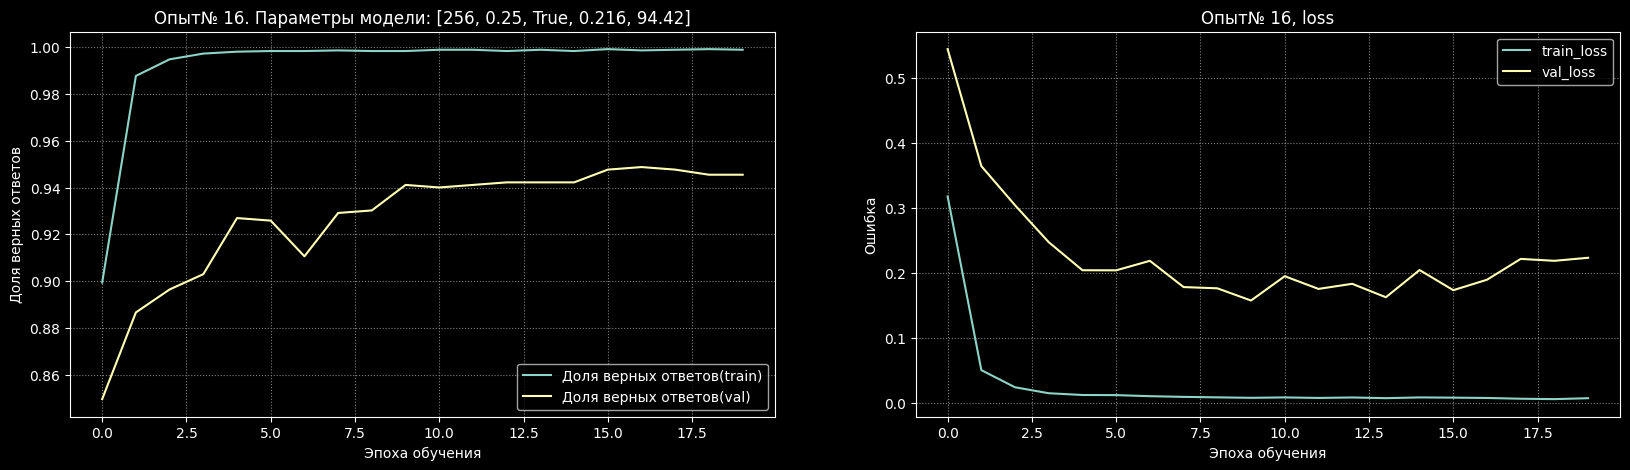

In [ ]:
for exp in range(len(val_loss)):
    graphic(loss[exp], acc[exp], val_loss[exp], val_acc[exp],
            par[exp][-1], par[exp][-2], exp, par[exp])


### Обучение модели с двумя слоями

In [ ]:
par, acc, loss, val_acc, val_loss = training(dense_param, drop_param, norm_param, 2)

Параметры модели: вх.нейр.= 32 ; откл.нейр.= 0.01 ; BatchNormalization= False
Epoch 1/20
29/29 [==============================] - 2s 10ms/step - loss: 0.9541 - accuracy: 0.7829 - val_loss: 0.7528 - val_accuracy: 0.8113
Epoch 2/20
29/29 [==============================] - 0s 6ms/step - loss: 0.3885 - accuracy: 0.9007 - val_loss: 0.3697 - val_accuracy: 0.8495
Epoch 3/20
29/29 [==============================] - 0s 8ms/step - loss: 0.1878 - accuracy: 0.9384 - val_loss: 0.2608 - val_accuracy: 0.8931
Epoch 4/20
29/29 [==============================] - 0s 7ms/step - loss: 0.1158 - accuracy: 0.9692 - val_loss: 0.2029 - val_accuracy: 0.9117
Epoch 5/20
29/29 [==============================] - 0s 7ms/step - loss: 0.0786 - accuracy: 0.9768 - val_loss: 0.1627 - val_accuracy: 0.9237
Epoch 6/20
29/29 [==============================] - 0s 9ms/step - loss: 0.0570 - accuracy: 0.9825 - val_loss: 0.1513 - val_accuracy: 0.9280
Epoch 7/20
29/29 [==============================] - 0s 8ms/step - loss: 0.0422 - 

#### Сводные результаты обучения

In [ ]:
print('2-й слой нейронов = Вх. слой * 2')
col = [' Число Нейронов ', ' Значение Dropout ',' BatchNormalization? ',' Loss тестовой ', ' Точность тестовой ']
df = pd.DataFrame(par, columns = col, index= np.arange(1, len(par)+1))
df

2-й слой нейронов = Вх. слой * 2


Число Нейронов    Значение Dropout    BatchNormalization?   \
1                 32                0.01                  False   
2                 32                0.25                  False   
3                 32                0.01                   True   
4                 32                0.25                   True   
5                 64                0.01                  False   
6                 64                0.25                  False   
7                 64                0.01                   True   
8                 64                0.25                   True   
9                128                0.01                  False   
10               128                0.25                  False   
11               128                0.01                   True   
12               128                0.25                   True   
13               256                0.01                  False   
14               256                0.25                  False   
15               256                0.01                   True   
16               256                0.25                   True   

     Loss тестовой    Точность тестовой   
1            0.1546                94.68  
2            0.1743                94.42  
3            0.2515                93.02  
4            0.3071                93.63  
5            0.2331                94.85  
6            0.2076                94.33  
7            0.2286                94.76  
8            0.2691                93.28  
9            0.2164                91.36  
10           0.2199                93.72  
11           0.2009                94.59  
12           0.2494                94.15  
13           0.1769                94.76  
14           0.2433                93.02  
15           0.2573                94.68  
16           0.2185                94.85

#### Графики обучения

Входных Нейронов: 32
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.1546
 Средняя точность на тестовой выборке: 94.67999999999999

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



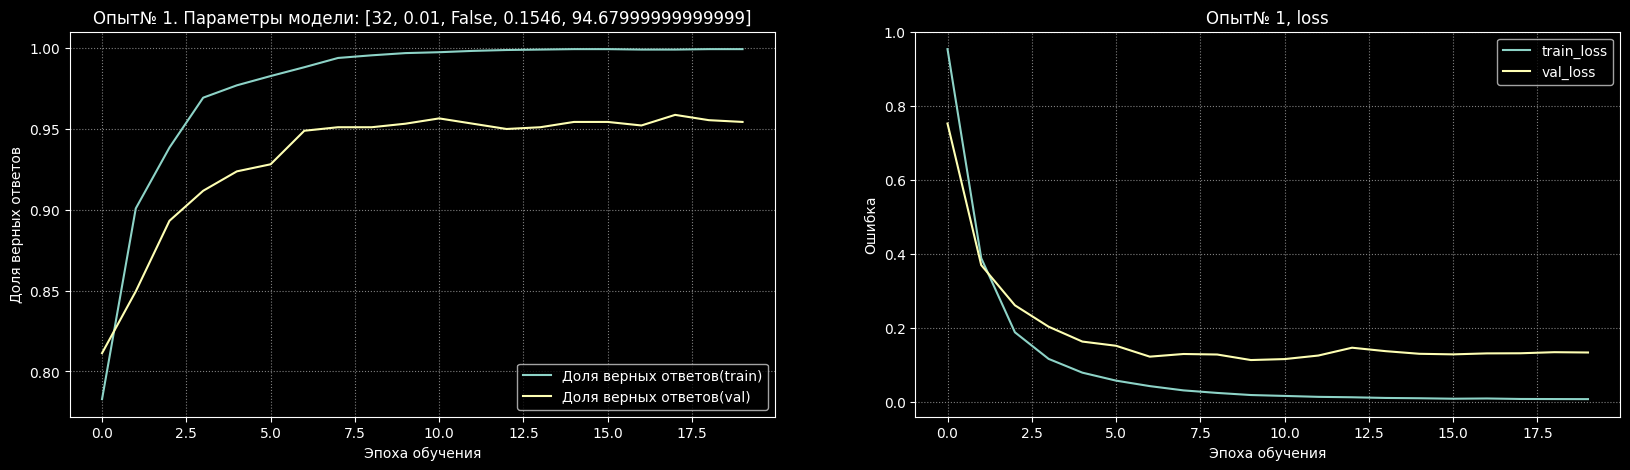

Входных Нейронов: 32
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.1743
 Средняя точность на тестовой выборке: 94.42

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



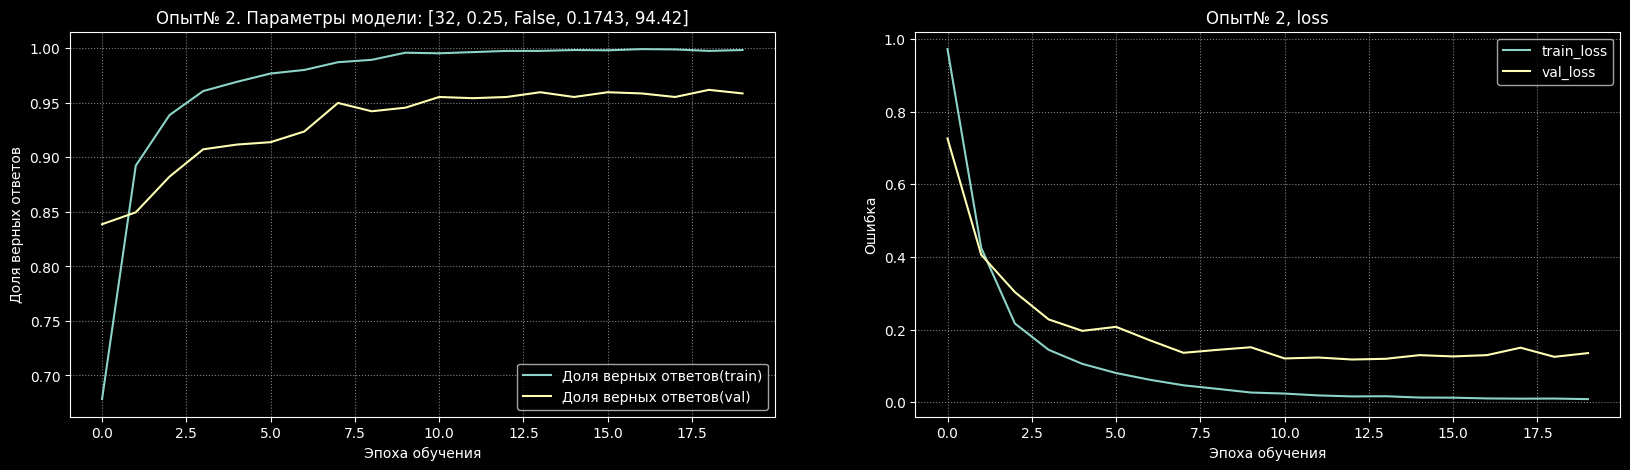

Входных Нейронов: 32
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.2515
 Средняя точность на тестовой выборке: 93.02

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



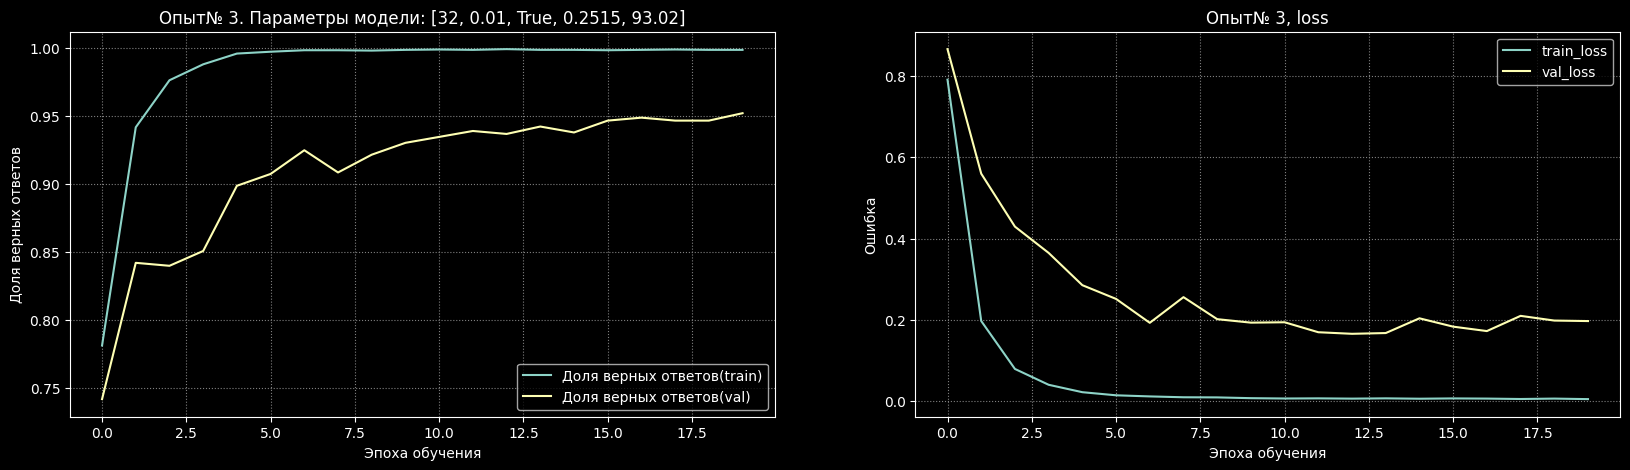

Входных Нейронов: 32
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.3071
 Средняя точность на тестовой выборке: 93.63

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



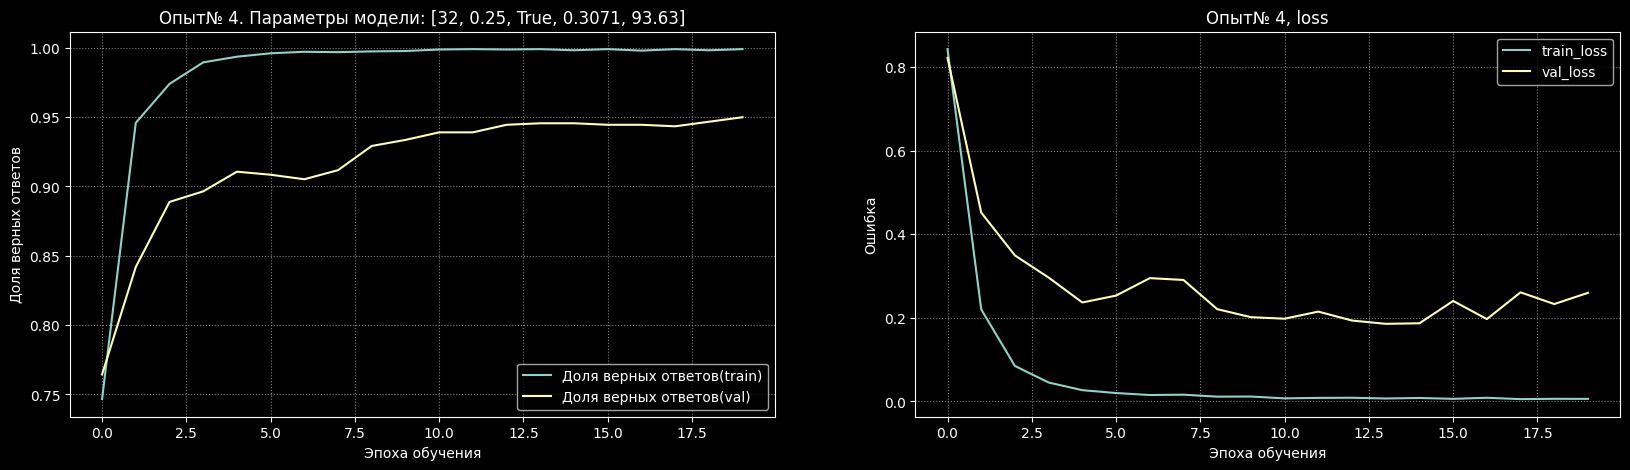

Входных Нейронов: 64
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.2331
 Средняя точность на тестовой выборке: 94.85

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



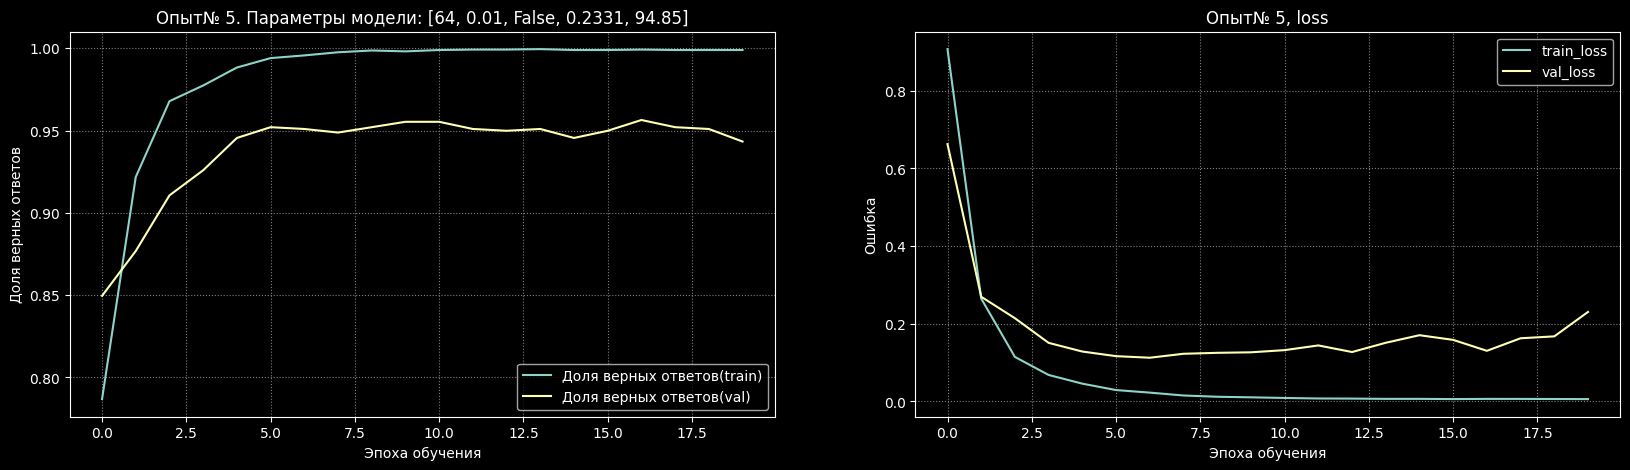

Входных Нейронов: 64
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.2076
 Средняя точность на тестовой выборке: 94.33

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



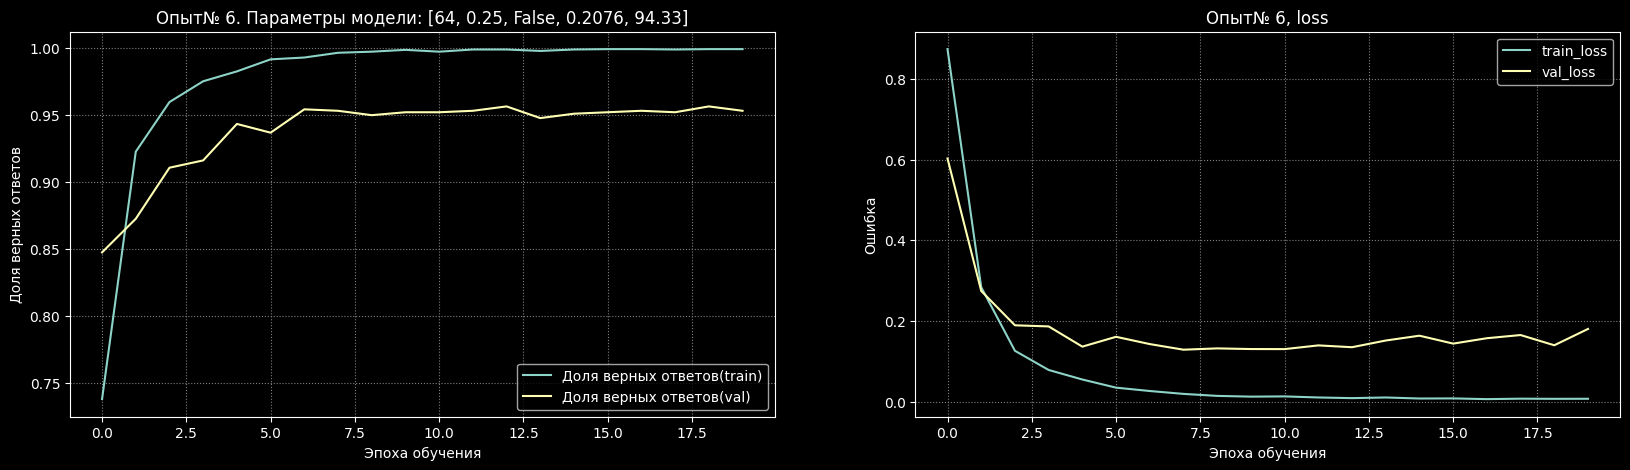

Входных Нейронов: 64
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.2286
 Средняя точность на тестовой выборке: 94.76

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



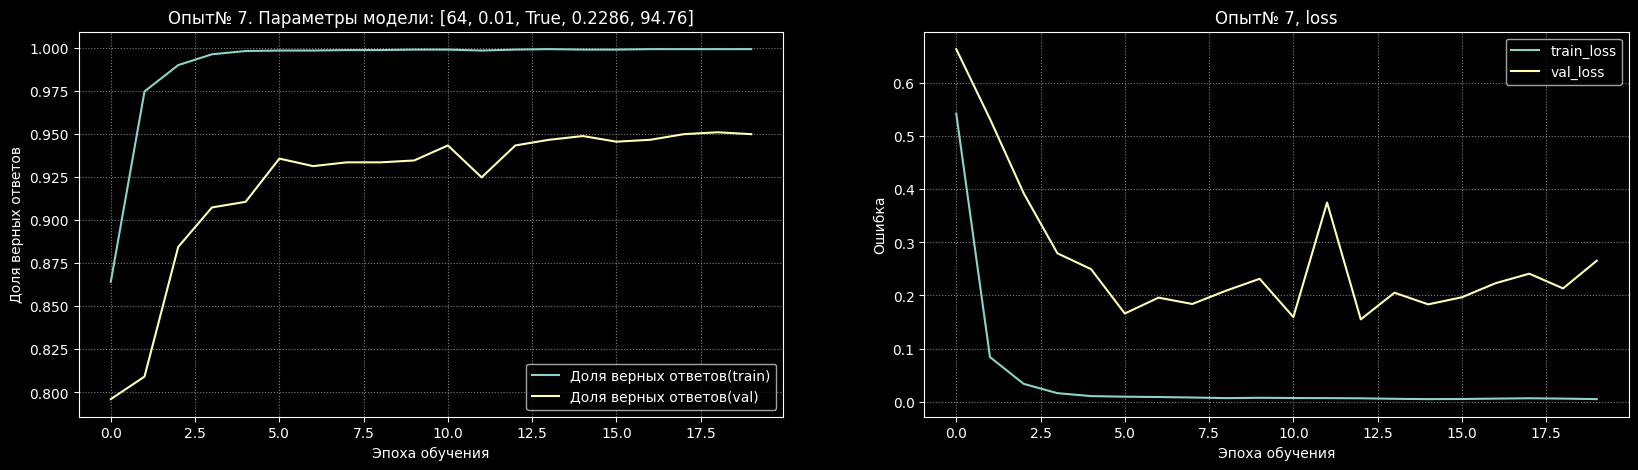

Входных Нейронов: 64
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.2691
 Средняя точность на тестовой выборке: 93.28

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



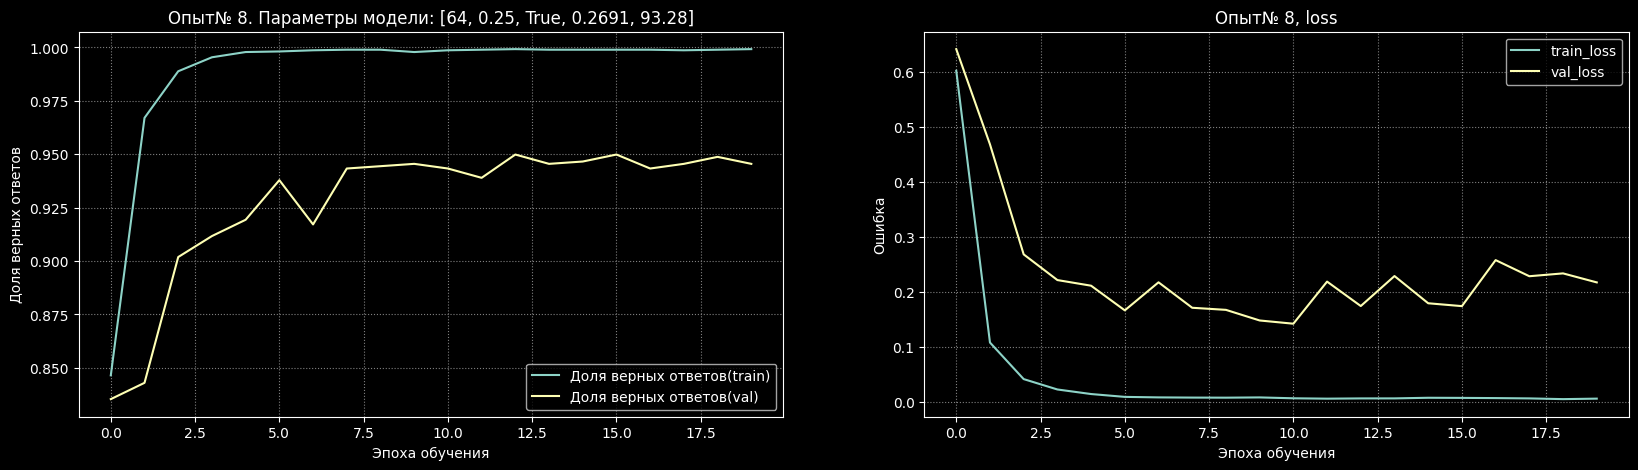

Входных Нейронов: 128
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.2164
 Средняя точность на тестовой выборке: 91.36

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



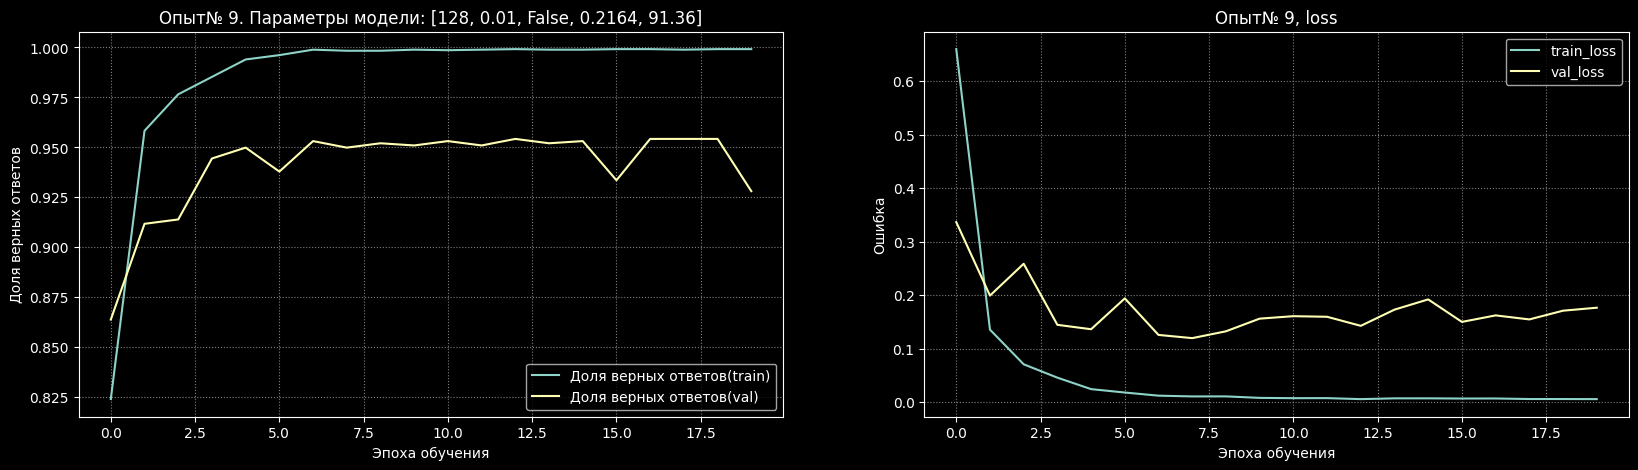

Входных Нейронов: 128
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.2199
 Средняя точность на тестовой выборке: 93.72

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



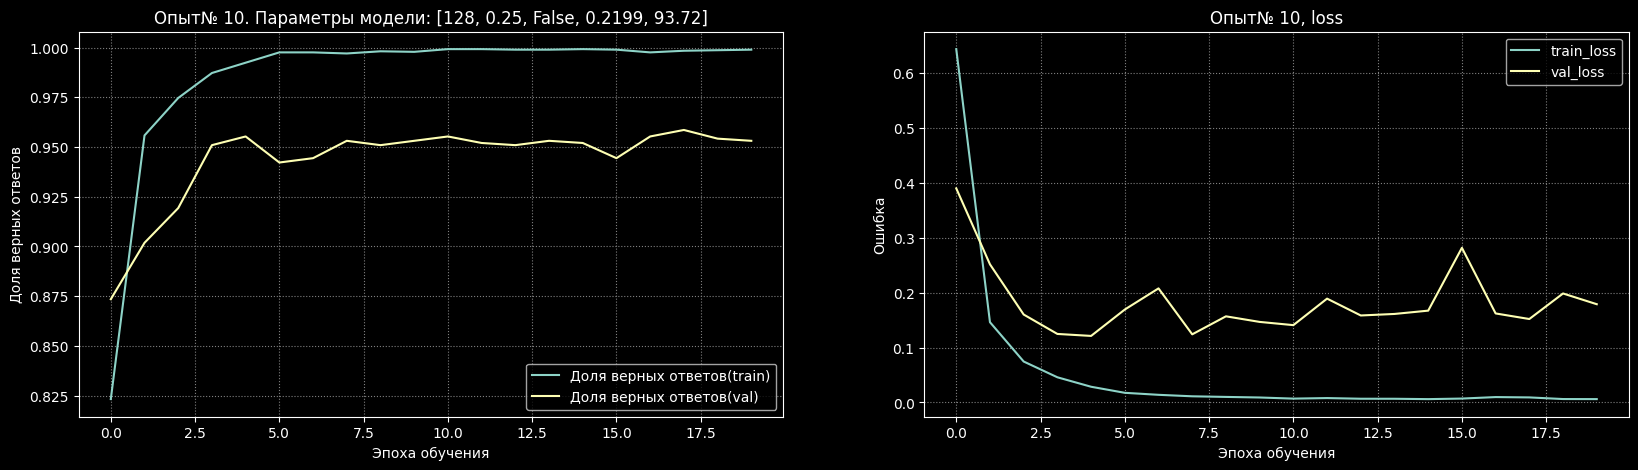

Входных Нейронов: 128
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.2009
 Средняя точность на тестовой выборке: 94.59

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



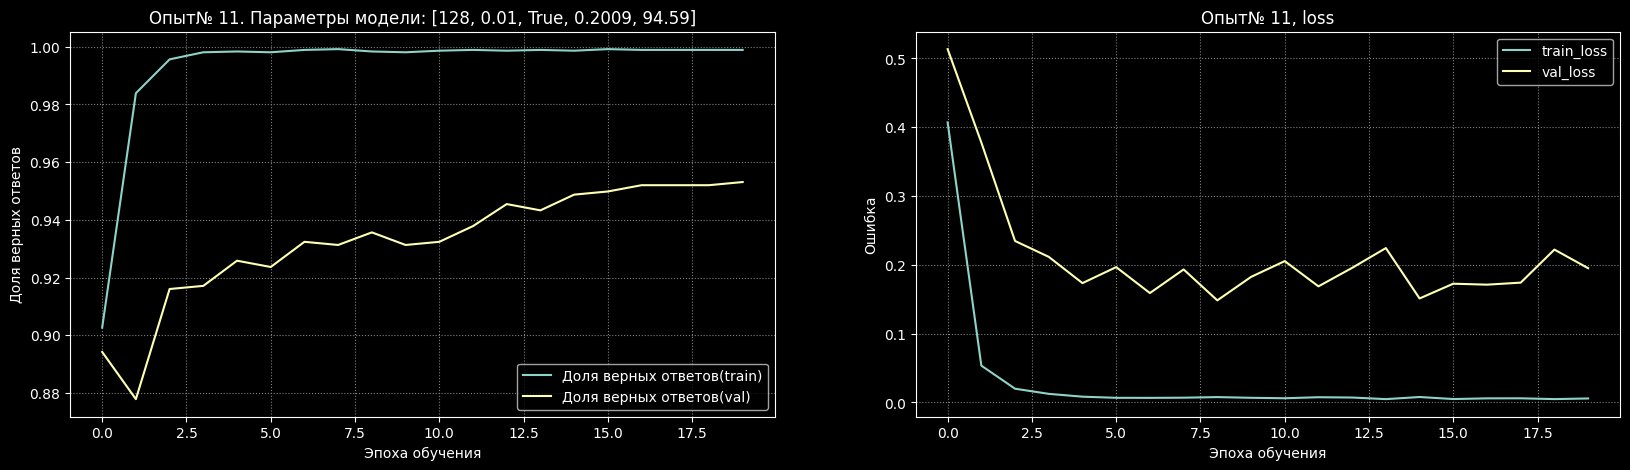

Входных Нейронов: 128
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.2494
 Средняя точность на тестовой выборке: 94.15

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



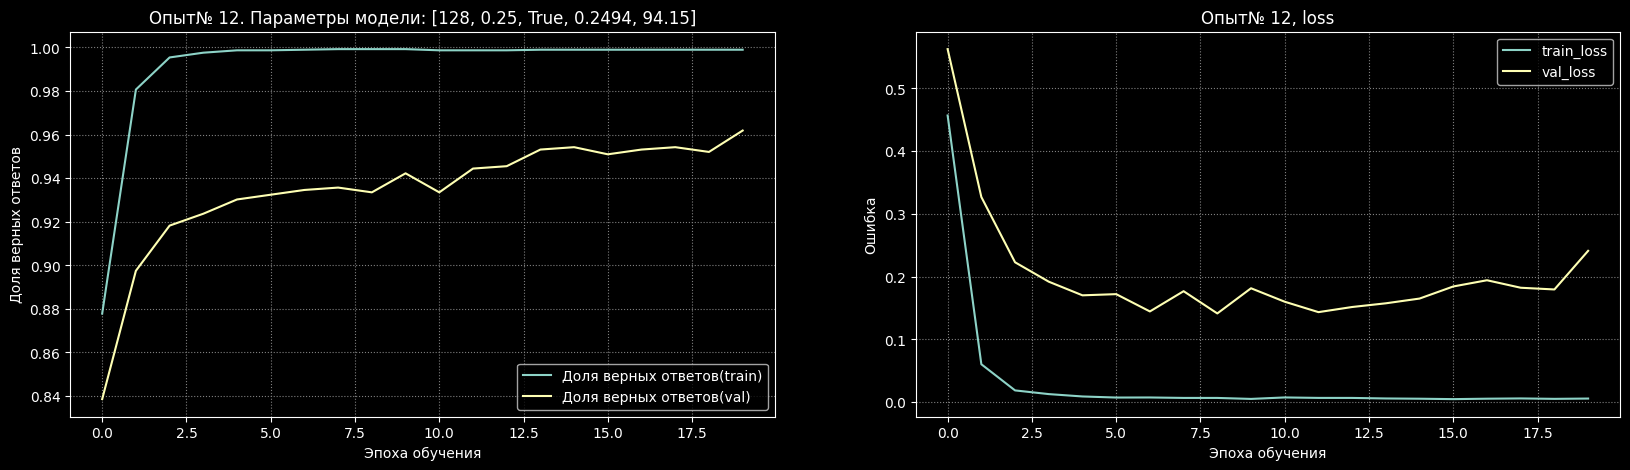

Входных Нейронов: 256
 Значение Dropout: 0.01
 BatchNormalization: False
 Средние потери: 0.1769
 Средняя точность на тестовой выборке: 94.76

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



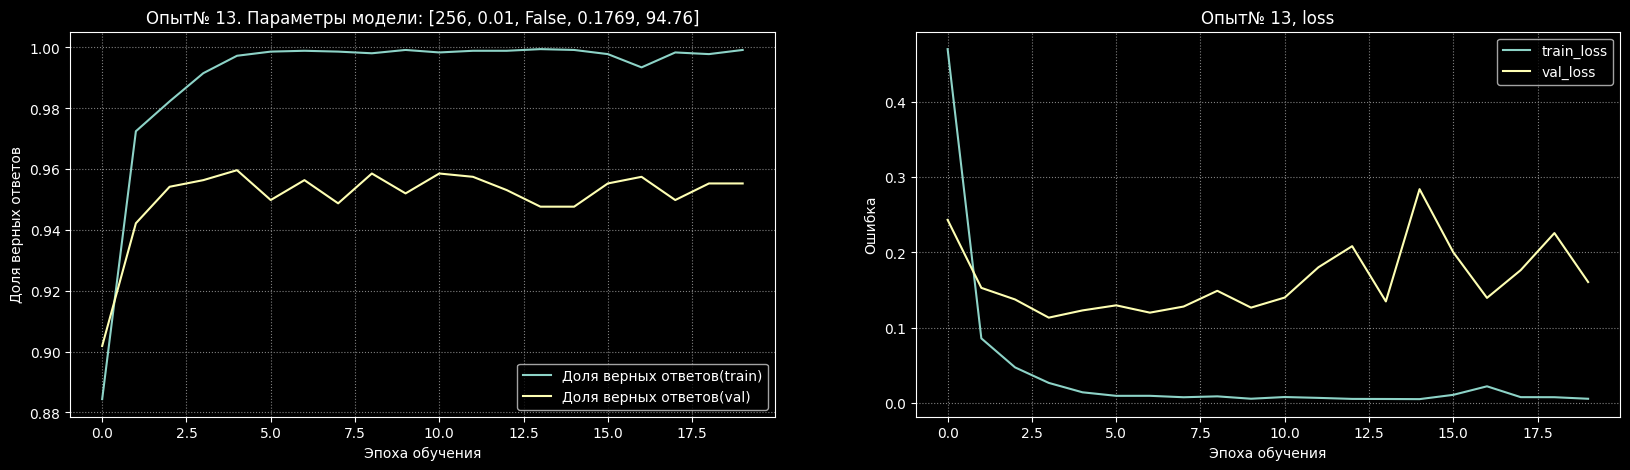

Входных Нейронов: 256
 Значение Dropout: 0.25
 BatchNormalization: False
 Средние потери: 0.2433
 Средняя точность на тестовой выборке: 93.02

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



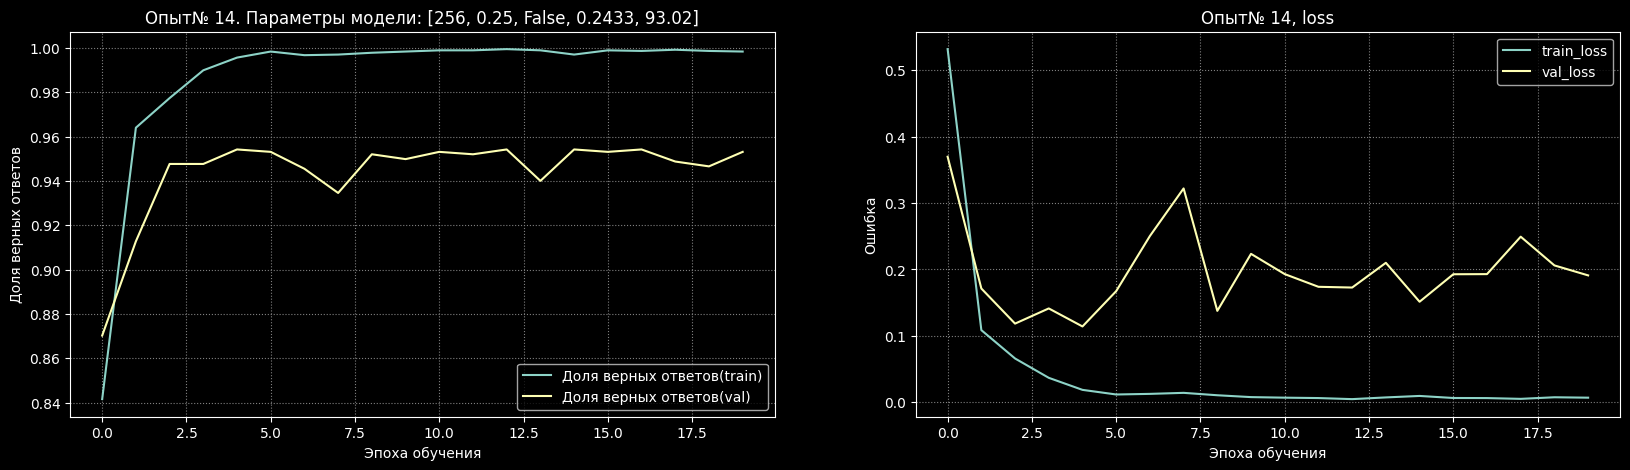

Входных Нейронов: 256
 Значение Dropout: 0.01
 BatchNormalization: True
 Средние потери: 0.2573
 Средняя точность на тестовой выборке: 94.67999999999999

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



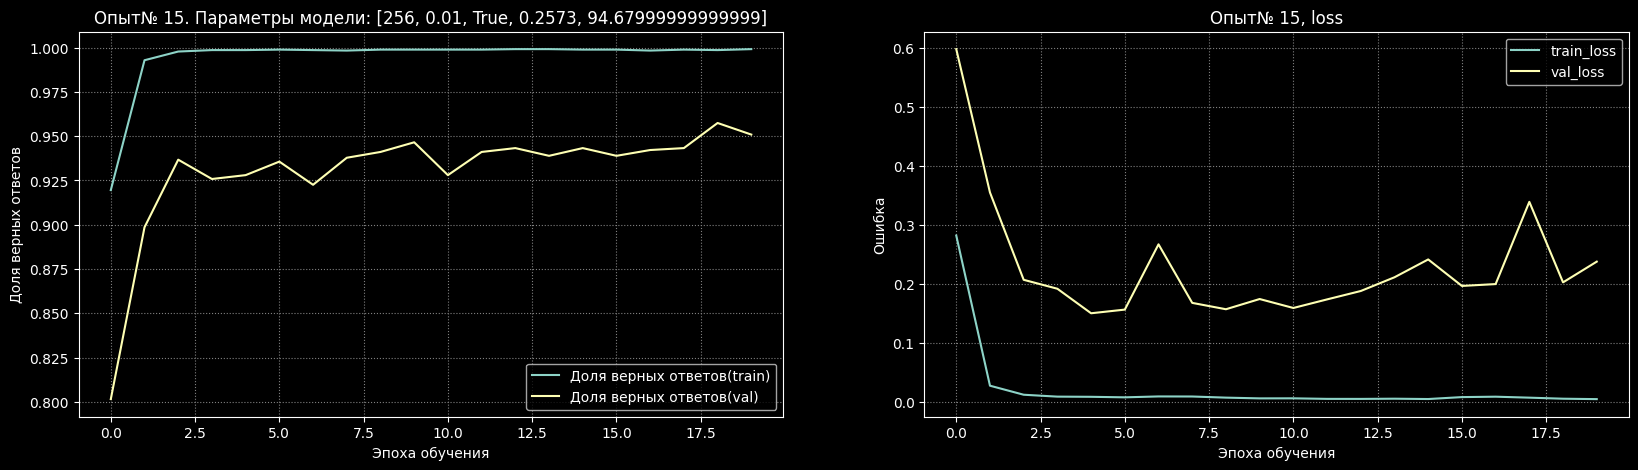

Входных Нейронов: 256
 Значение Dropout: 0.25
 BatchNormalization: True
 Средние потери: 0.2185
 Средняя точность на тестовой выборке: 94.85

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓



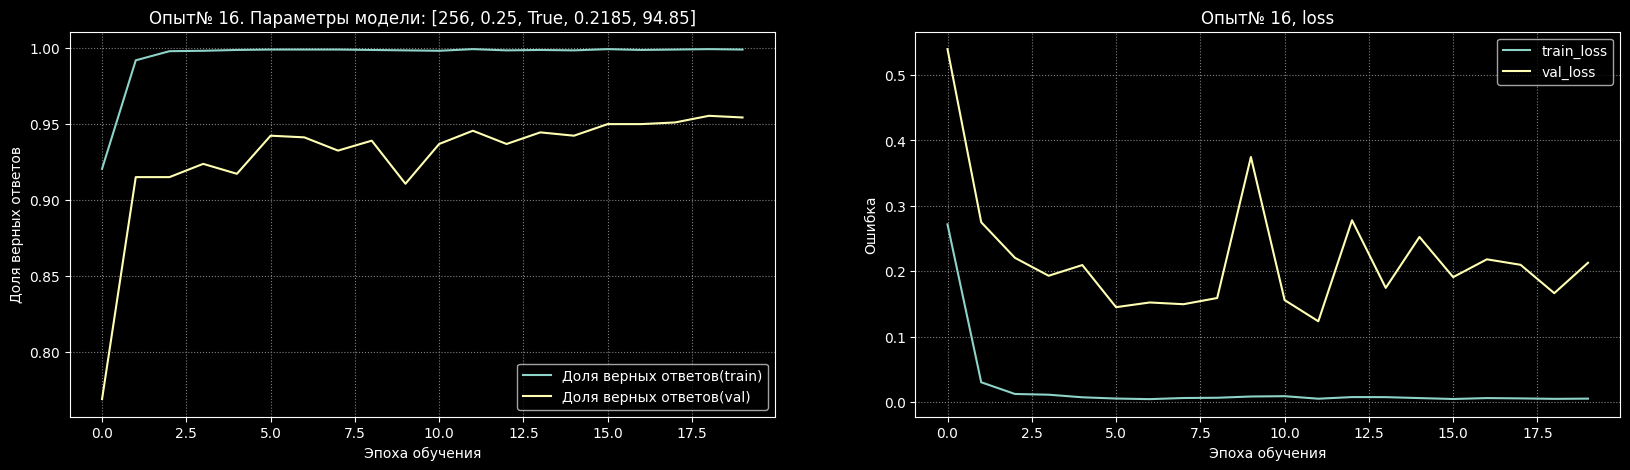

In [ ]:
for exp in range(len(val_loss)):
    graphic(loss[exp], acc[exp], val_loss[exp], val_acc[exp],
            par[exp][-1], par[exp][-2], exp, par[exp])

### Сводная таблица (1 слой)

Число Нейронов    Значение Dropout    BatchNormalization?   \
1                 32                0.01                  False   
2                 32                0.25                  False   
3                 32                0.01                   True   
4                 32                0.25                   True   
5                 64                0.01                  False   
6                 64                0.25                  False   
7                 64                0.01                   True   
8                 64                0.25                   True   
9                128                0.01                  False   
10               128                0.25                  False   
11               128                0.01                   True   
12               128                0.25                   True   
13               256                0.01                  False   
14               256                0.25                  False   
15               256                0.01                   True   
16               256                0.25                   True   

     Loss тестовой    Точность тестовой   
1            0.1434                94.24  
2            0.1362                94.15  
3            0.2571                93.80  
4            0.2364                94.15  
5            0.1492                94.24  
6            0.1544                94.33  
7            0.2297                93.11  
8            0.2128                93.54  
9            0.1446                94.33  
10           0.1482                94.07  
11           0.2242                93.72  
12           0.2333                93.72  
13           0.1609                94.24  
14           0.1584                94.42  
15           0.2085                94.68  
16           0.2160                94.42

### Сводная таблица (2 слоя)

2-й слой нейронов = Вх. слой * 2


Число Нейронов    Значение Dropout    BatchNormalization?   \
1                 32                0.01                  False   
2                 32                0.25                  False   
3                 32                0.01                   True   
4                 32                0.25                   True   
5                 64                0.01                  False   
6                 64                0.25                  False   
7                 64                0.01                   True   
8                 64                0.25                   True   
9                128                0.01                  False   
10               128                0.25                  False   
11               128                0.01                   True   
12               128                0.25                   True   
13               256                0.01                  False   
14               256                0.25                  False   
15               256                0.01                   True   
16               256                0.25                   True   

     Loss тестовой    Точность тестовой   
1            0.1546                94.68  
2            0.1743                94.42  
3            0.2515                93.02  
4            0.3071                93.63  
5            0.2331                94.85  
6            0.2076                94.33  
7            0.2286                94.76  
8            0.2691                93.28  
9            0.2164                91.36  
10           0.2199                93.72  
11           0.2009                94.59  
12           0.2494                94.15  
13           0.1769                94.76  
14           0.2433                93.02  
15           0.2573                94.68  
16           0.2185                94.85